# 绘图

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
%matplotlib inline 

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

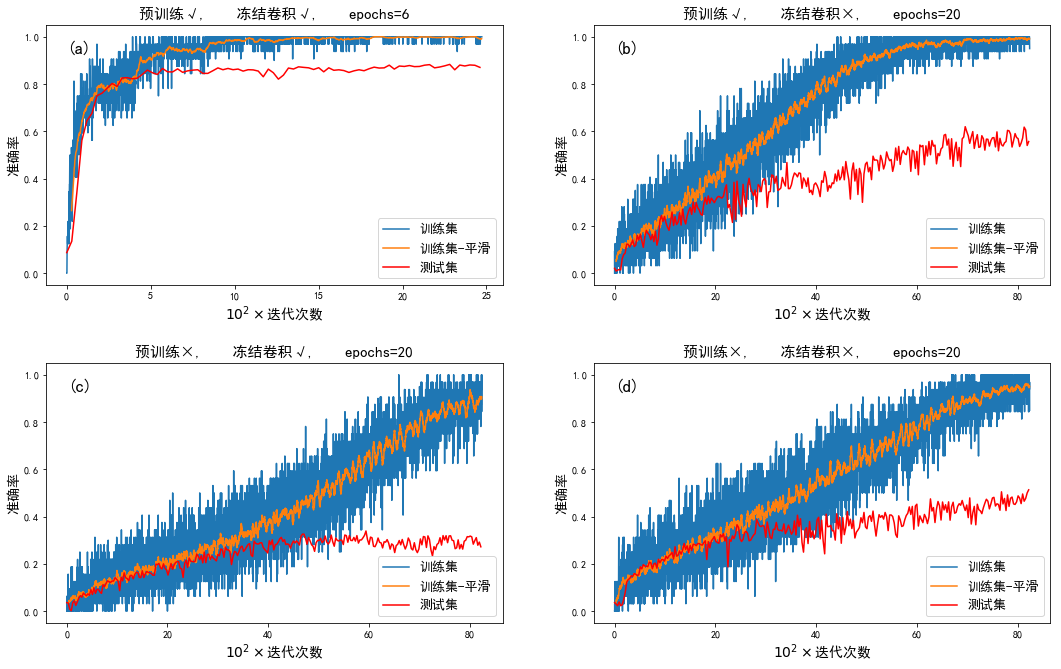

In [4]:
history_dir = 'history'
history_names = ['history_32', # 载入pretrained并冻结
                 'notfreeze-history_32', # 载入pretrained但不冻结
                 'freeze-nopretrained-history_32', # 不载入pretrained但冻结
                 'notfreeze-nopretrained-history_32'] # 不载入pretrained并不冻结
                 
titles = ['预训练√,    冻结卷积√',
          '预训练√,    冻结卷积×',
          '预训练×,    冻结卷积√',
          '预训练×,    冻结卷积×']
epochs = [6,20,20,20]
titles = [titles[i]+',    epochs='+str(epochs[i]) for i in range(4)]
plt.figure(figsize =(18,11))
for index, name in enumerate(history_names):
    history_root = os.path.join(history_dir,name)
    train_losses = np.load(os.path.join(history_root,'train_losses.npy'),allow_pickle =True)
    train_accs = np.load(os.path.join(history_root,'train_accs.npy'),allow_pickle=True)
    test_losses = np.load(os.path.join(history_root, 'test_losses.npy'),allow_pickle=True)
    test_accs = np.load(os.path.join(history_root,'test_accs.npy'),allow_pickle=True)
    train_indices = np.load(os.path.join(history_root, 'train_indices.npy'),allow_pickle=True)
    test_indices = np.load(os.path.join(history_root, 'test_indices.npy'),allow_pickle=True)
    
    plt.subplot(2,2,index+1)
    plt.plot(np.arange(1,len(train_accs)+1)/100,train_accs,label='训练集')

    train_accs_smoothing = [] 
    smooth_num = 30
    for i in range(len(train_accs)-smooth_num):
        begin_index = i
        end_index = i+smooth_num
        temp = train_accs[begin_index:end_index]
        train_accs_smoothing.append(np.mean(temp))
    plt.plot(np.arange(smooth_num,len(train_accs))/100,train_accs_smoothing,label='训练集-平滑')
    plt.plot(np.arange(1,min(len(train_accs),len(test_accs-1)*30+1)+1,30)/100,test_accs,'red',label='测试集')
    plt.ylabel('准确率',fontsize=14)
    plt.xlabel('$10^2\\times$迭代次数',fontsize=14)
    plt.title(titles[index],fontsize=15)
    if index<4:
        plt.text(0,0.93,'({})'.format('abcd'[index]),fontsize=17)
    else:
        plt.text(8000,0.1, '({})'.format('abcd'[index]),fontsize=17)
    plt.legend(fontsize=13, loc=4)
    
plt.subplots_adjust(hspace=0.3)
plt.savefig('curves-中文.png',dpi=300,bbox_inches='tight')
plt.show()

In [2]:
history_dir = 'history'
history_names = ['history_32', # 载入pretrained并冻结
                 'notfreeze-history_32', # 载入pretrained但不冻结
                 'freeze-nopretrained-history_32', # 不载入pretrained但冻结
                 'notfreeze-nopretrained-history_32'] # 不载入pretrained并不冻结
                 
titles = ['pretrained=True,    freeze=True',
          'pretrained=True,    freeze=False',
          'pretrained=False,    freeze=True',
          'pretrained=False,    freeze=False']
best_acc_ls = [] 
for index, name in enumerate(history_names):
    history_root = os.path.join(history_dir,name)
    train_losses = np.load(os.path.join(history_root,'train_losses.npy'),allow_pickle =True)
    train_accs = np.load(os.path.join(history_root,'train_accs.npy'),allow_pickle=True)
    test_losses = np.load(os.path.join(history_root, 'test_losses.npy'),allow_pickle=True)
    test_accs = np.load(os.path.join(history_root,'test_accs.npy'),allow_pickle=True)
    train_indices = np.load(os.path.join(history_root, 'train_indices.npy'),allow_pickle=True)
    test_indices = np.load(os.path.join(history_root, 'test_indices.npy'),allow_pickle=True)
    best_acc_ls.append(max(test_accs))
best_acc_ls

[0.8831097506559812,
 0.6196527343529922,
 0.33899077199972594,
 0.5131662281659933]

# Feature Selection

In [8]:
import pandas as pd 

if 's_tr_' in vars() and s_tr_!=[]:
    pass 
else:
#     s_tr_ = np.load('data_for_svm/s_tr_svm.npy',allow_pickle=True)
#     s_te_ = np.load('data_for_svm/s_te_svm.npy',allow_pickle=True)
    df_svm = pd.read_csv('data_for_svm/history_svm.csv')
    s_tr_ = np.array(df_svm['train_acc'])
    s_te_ = np.array(df_svm['test_acc'])
    feature_nums = np.array(df_svm['nums'])
    
a,b = 0.003474948857504783, 0.00012965231092933836

d:\other_all\application\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


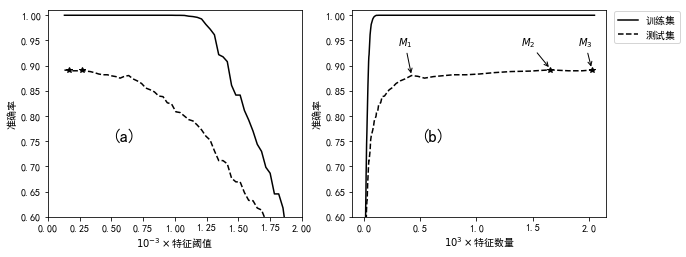

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,3.8))
plt.subplot(121)
x = np.linspace(b,a,100)#[:84]
plt.plot(x*1000,s_tr_,'k',label = '训练集')
plt.plot(x*1000,s_te_,'k--',label = '测试集')
plt.plot(x[np.array(s_te_)>np.array(s_te_)[0]]*1000,np.array(s_te_)[np.array(s_te_)>np.array(s_te_)[0]],'k*')
# plt.title('SVM')
plt.xlabel('$10^{-3}\\times$特征阈值')
plt.ylabel('准确率')
# plt.ticklabel_format(style='sci',scilimits=(0,0),axis='x')
# plt.legend()
plt.ylim(0.6,1.01)
plt.xlim(0,0.002*1000)
# plt.text(0.1*1e-3*1000,1.02,'(a)',fontsize=12)
plt.text(0.5,0.75,'(a)',fontsize=17)

plt.subplot(122)
plt.plot(feature_nums/1000,s_tr_,'k',label = '训练集')
plt.plot(feature_nums/1000,s_te_,'k--',label = '测试集')
plt.plot(np.array(feature_nums)[np.array(s_te_)>np.array(s_te_)[0]]/1000,np.array(s_te_)[np.array(s_te_)>np.array(s_te_)[0]],'k*')
plt.ylim(0.6,1.01)
# plt.title('SVM')
plt.xlabel('$10^3\\times$特征数量')
plt.ylabel('准确率')
plt.annotate(s = '$M_1$',xy = (424/1000, 0.8805), xytext=(300/1000,0.94),arrowprops={'arrowstyle':'->'})
plt.annotate(s = '$M_2$',xy = (1654/1000, 0.894), xytext=(1400/1000,0.94),arrowprops={'arrowstyle':'->'})
plt.annotate(s = '$M_3$',xy = (2023/1000, 0.894), xytext=(1900/1000,0.94),arrowprops={'arrowstyle':'->'})
plt.legend(bbox_to_anchor=(1.01,1.02))
# plt.text(0.1/1000,1.03,'(b)',fontsize=12)
plt.text(0.5,0.75,'(b)',fontsize=17)
plt.savefig('svm_select_merge-中文.png',dpi = 200)
plt.show()

# 模型冻结可视化与分析

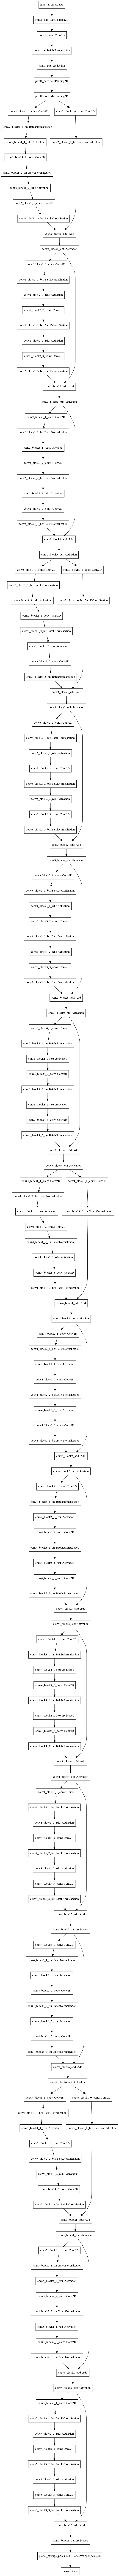

In [1]:
import keras as K
import keras

def ResNet50Model():
    model = K.applications.ResNet50(include_top=False, weights=None, input_shape =(224, 224, 3))
    
    new_output = K.layers.GlobalAveragePooling2D()(model.output)
    new_output = K.layers.Dense(104, activation = 'softmax')(new_output)
    
    model = K.engine.training.Model(model.inputs, new_output)
    
    return model

model = ResNet50Model()

# Freez first 168 Layers Except the Batch Normalization ones.
num_feerezed_layer = 168

for layer in model.layers:
    layer.trainable = True
    
    if isinstance(layer, K.layers.BatchNormalization):
        # Set Batch Norm momentun to 0.9 to faster adapt to the new DataSet.
        layer.momentum = 0.9

for layer in model.layers[:num_feerezed_layer]:
    
    if not isinstance(layer, K.layers.BatchNormalization):
        layer.trainable = False
        
keras.utils.plot_model(model)

In [2]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [3]:
len(model.layers)

177